## Titanic - Machine Learning from Disaster

### Importing Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [21]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
full = pd.concat([train, test], ignore_index=True)

In [22]:
full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [23]:
full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [24]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [25]:
full.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Data Visualization & Data Exploration

In [43]:
def histogram_boxplot(data, feature, figsize=(12, 8), dpi=100, kde=False, bins=50):
    """
    Histogram and boxplot for a given feature
    
    Args:
        data: dataframe
        feature: str, feature name
        figsize: tuple, figure size
        dpi: int, figure dpi
        kde: bool, whether to plot kde
        bins: int, number of bins
    """

    figs, (ax_box, ax_hist) = plt.subplots(2,
                                           sharex=True,
                                           gridspec_kw={'height_ratios': (.15, .85)},
                                           figsize=figsize,
                                           dpi=dpi)

    sns.boxplot(data,
                x=feature,
                ax=ax_box,
                showmeans=True,
                color='red',
                meanline=True)

    sns.histplot(data[feature],
                 ax=ax_hist,
                 kde=kde,
                 bins=bins)

    ax_hist.axvline(data[feature].mean(),
                    color='green',
                    linestyle='--')

    ax_hist.axvline(data[feature].median(),
                    color='black',
                    linestyle='-')

    ax_box.set_title(f'{feature}', fontsize=15)


In [48]:
def stacked_barplot(data, predictor, target):
    """
    Stacked barplot
    
    Args:
        data: dataframe
        predictor: str, predictor name
        target: str, target name
    """

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    tab_1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)

    print(tab_1)
    print('----------------------DIVIDED-------------------------')

    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(by=sorter, ascending=False)

    fig, ax = plt.subplots(figsize=(count + 5, 5), dpi=100)

    tab.plot(kind='bar', stacked=True, ax=ax)

    plt.show()

Survived  0.0  1.0  All
Pclass                 
All       549  342  891
1          80  136  216
3         372  119  491
2          97   87  184
----------------------DIVIDED-------------------------


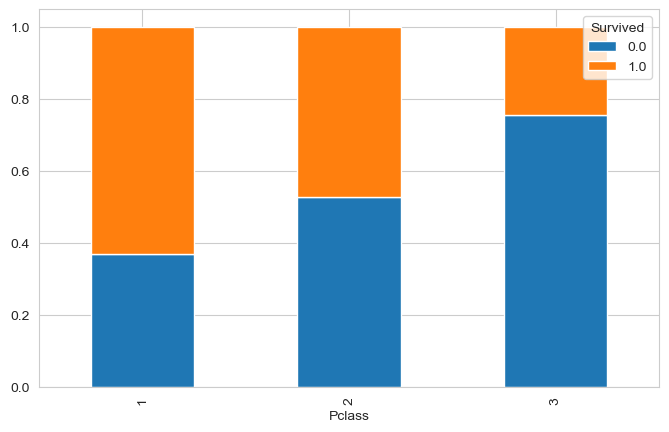

In [49]:
stacked_barplot(full, 'Pclass', 'Survived')

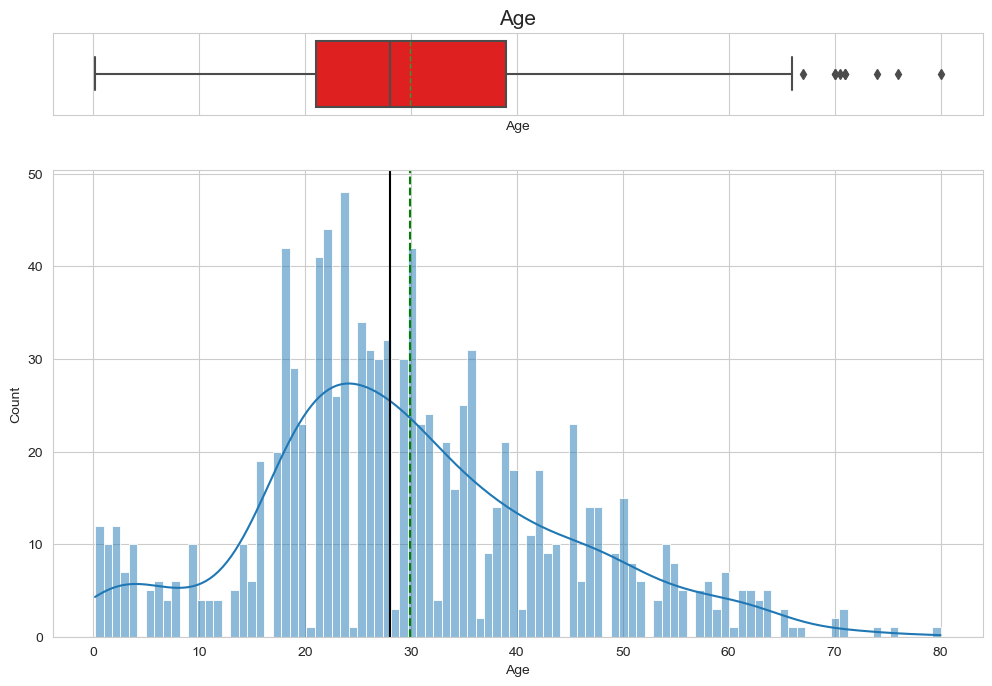

In [46]:
histogram_boxplot(full, 'Age', bins=100, kde=True)